# v6 - final simulations, before hardware execution

___________________
___________________
___________________

In [1]:
%load_ext autoreload
%autoreload 2

from troter_utils import *

### Quantum Devices


In [2]:
# load IBMQ Account data
provider = IBMQ.load_account()

# Get backend for experiment
provider = IBMQ.get_provider(hub='ibm-q-community', group='ibmquantumawards', project='open-science-22')
jakarta = provider.get_backend('ibmq_jakarta')

# Simulated backend based on ibmq_jakarta's device noise profile
sim_noisy_jakarta = QasmSimulator.from_backend(provider.get_backend('ibmq_jakarta'))

# Noiseless simulated backend
sim_no_noise = QasmSimulator()

____________

## First order

- Steps: 4 to 8;
- Variable time;
- Minimum time: 0.1 and 0.01;

In [3]:
results = {"order" : [],
           "n_steps" : [],
           "t_min" : [],
           "state_tomo_fids" : [],
           "fid_pi" : [],
           "best_params" : []}




################################################################################
################################################################################
                                    Order: 1                                    
                                   # steps: 4                                   
                                 min time: 0.1                                  
################################################################################
################################################################################





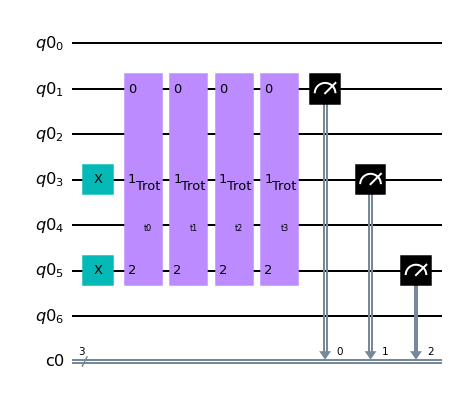

################################################################################

Starting optimization!


Optimizer: SLSQP
eps = 0.1

Iter 1 done!
Loss value: -0.11335
Current parameters: [0.1   1.507 0.589 0.946] (sum to 3.14)

Iter 2 done!
Loss value: -0.44467
Current parameters: [0.1   1.606 0.224 1.212] (sum to 3.14)

Iter 3 done!
Loss value: -0.53845
Current parameters: [0.1   1.436 0.1   1.505] (sum to 3.14)

Iter 4 done!
Loss value: -0.53845
Current parameters: [0.1   1.437 0.1   1.504] (sum to 3.14)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.53845
            Iterations: 4
            Function evaluations: 31
            Gradient evaluations: 4

Total time of optimization: 00:00:57

Optimizer: SLSQP
eps = 0.01

Iter 1 done!
Loss value: -0.11235
Current parameters: [0.1   1.493 0.592 0.957] (sum to 3.14)

Iter 2 done!
Loss value: -0.46705
Current parameters: [0.132 1.666 0.1   1.243] (sum to 3.14)

Iter 3 done!
Loss value: -0.5

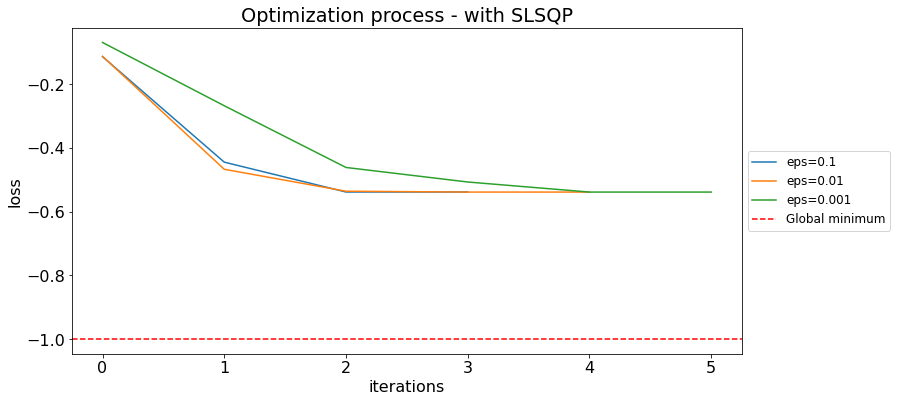


Optimization results:



,optimizer,eps,final_params,final_loss
1,slsqp,0.010,"[0.10000000000000007, 1.4519467921417748, 0.1,...",-0.53864
2,slsqp,0.001,"[0.1, 1.448619686239124, 0.1, 1.492972967350669]",-0.53864
0,slsqp,0.100,"[0.1, 1.4363186606112568, 0.1, 1.5052739929785...",-0.53845


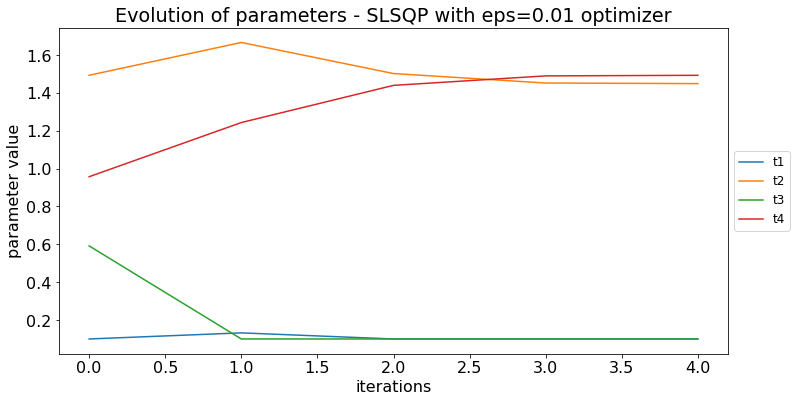

Best parameters (sum to 3.14):	[0.1   1.452 0.1   1.49 ]
Best parameters (sum to 1):	[0.032 0.462 0.032 0.474]


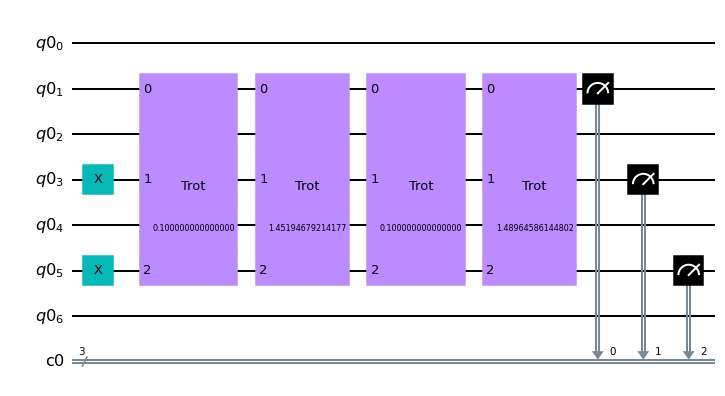

################################################################################
Single trotterization step:


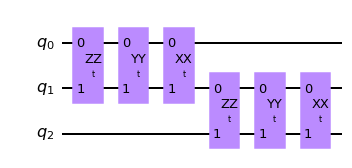

################################################################################

All steps + measurements of state tomography:


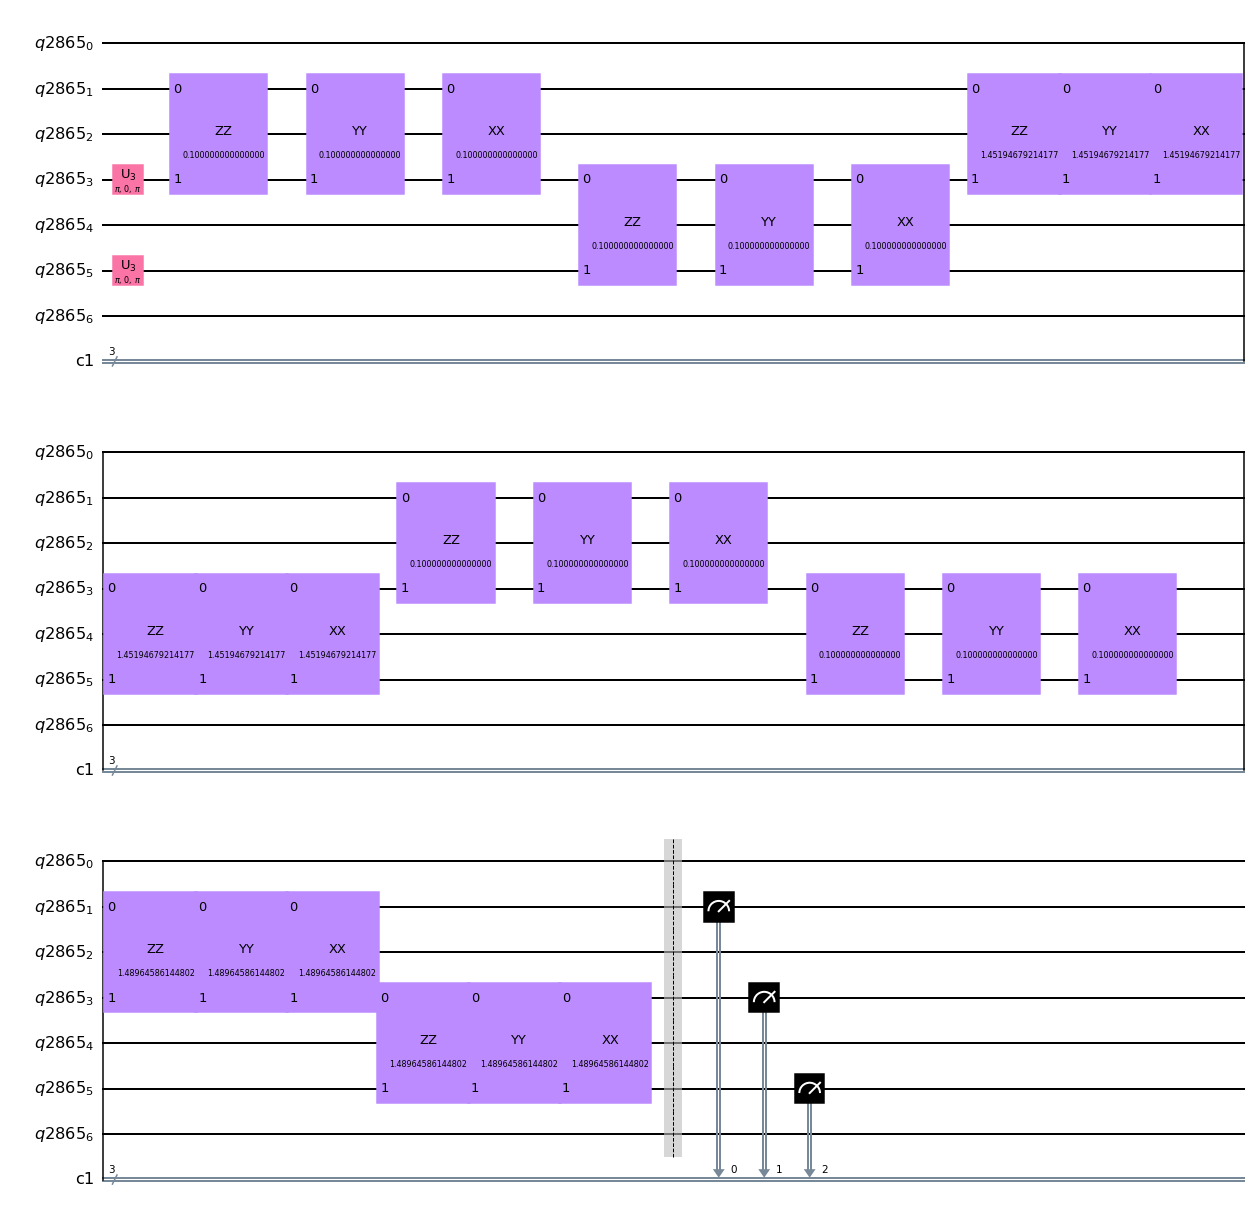

################################################################################

1/8 - Job ID 624af604f9156f34f6cc05c8
2/8 - Job ID 624af611133bfd6b235ac36b
3/8 - Job ID 624af623be9f60092c771c2d
4/8 - Job ID 624af62f1a95e09af25cdfe4
5/8 - Job ID 624af63db3213dfb2ac06576
6/8 - Job ID 624af64a133bfdf6165ac36c
7/8 - Job ID 624af657267dc73fccbd8a96
8/8 - Job ID 624af66499622534288bb8a0


In [ ]:
order = 1
uniform_times = False
backend_opt, backend_state_tomo = sim_noisy_jakarta, jakarta
quadratic_loss = False

steps = range(4, 9)
min_times = [0.1, 0.01]

combs = itertools.product(steps, min_times)

for trotter_steps, params_bounds_min in combs:
    
    print("\n\n")    
    print("#"*80)
    print("="*80)
    print("#"*80)
    print(f"Order: {order}".center(80))
    print(f"# steps: {trotter_steps}".center(80))
    print(f"min time: {params_bounds_min}".center(80))
    print("#"*80)
    print("="*80)
    print("#"*80)
    print("\n\n")
    
    fids, fidelity_pi, best_params = optimize_params_and_run(order, trotter_steps, uniform_times, params_bounds_min,
                                                             backend_opt, backend_state_tomo, quadratic_loss)
    
    results['order'].append(order)
    results['n_steps'].append(trotter_steps)
    results['t_min'].append(params_bounds_min)
    results['state_tomo_fids'].append(fids)
    results['fid_pi'].append(fidelity_pi)
    results['best_params'].append(best_params)

In [ ]:
results_first_order = pd.DataFrame(results).sort_values("fid_pi", ascending=False)

results_first_order

___________

## Second order

- Steps: 4 to 8;
- Variable time;
- Minimum time: 0.1 and 0.01;

In [ ]:
results = {"order" : [],
           "n_steps" : [],
           "t_min" : [],
           "state_tomo_fids" : [],
           "fid_pi" : [],
           "best_params" : []}

In [ ]:
order = 2
uniform_times = False
backend_opt, backend_state_tomo = sim_noisy_jakarta, jakarta
quadratic_loss = False

steps = range(4, 9)
min_times = [0.1, 0.01]

combs = itertools.product(steps, min_times)

for trotter_steps, params_bounds_min in combs:
    
    print("\n\n")    
    print("#"*80)
    print("="*80)
    print("#"*80)
    print(f"Order: {order}".center(80))
    print(f"# steps: {trotter_steps}".center(80))
    print(f"min time: {params_bounds_min}".center(80))
    print("#"*80)
    print("="*80)
    print("#"*80)
    print("\n\n")
    
    fids, fidelity_pi, best_params = optimize_params_and_run(order, trotter_steps, uniform_times, params_bounds_min,
                                                             backend_opt, backend_state_tomo, quadratic_loss)
    
    results['order'].append(order)
    results['n_steps'].append(trotter_steps)
    results['t_min'].append(params_bounds_min)
    results['state_tomo_fids'].append(fids)
    results['fid_pi'].append(fidelity_pi)
    results['best_params'].append(best_params)

In [ ]:
results_second_order = pd.DataFrame(results).sort_values("fid_pi", ascending=False)

results_second_order